# Preprocessing

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [153]:
# Bring in the data
df = pd.read_csv("game-data-revised.csv")
df.head(1)

,Team,Opponent,Team-Score,Opponent-Score,Win,Date,Time,Location,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg
0,Cleveland Cavaliers,Washington Wizards,94,84,1,10/30/12,7:00 PM,"Quicken Loans Arena, Cleveland, Ohio",36,79,0.456,7,20,0.35,15,22,0.682,18,36,54,22,7,5,20,21,0.53,0.5,0.253,0.278,46.2,66.7,58.1,61.1,8.0,8.6,18.4,106.9,95.5


### Create 'Seasons' Variable

In [154]:
# Prepare the data by changing type to date
df.Date = pd.to_datetime(df.Date)

In [155]:
position = len(df.columns)
df['Season'] = ""

for i in range(0, len(df)):
    # 2012-13 Season: October 30, 2012 - June 20, 2013
    if df.iloc[i, 5] >= pd.Timestamp('2012-10-30 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2013-6-20 00:00:00'):
        df.iloc[i, position] = '2012-13'
    
    # 2013-14 Season: October 29, 2013 - June 15, 2014
    elif df.iloc[i, 5] >= pd.Timestamp('2013-10-29 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2014-6-15 00:00:00'):
        df.iloc[i, position] = '2013-14'
    
    # 2014-15 Season: October 29, 2014 - June 16, 2015
    elif df.iloc[i, 5] >= pd.Timestamp('2014-10-28 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2015-6-16 00:00:00'):
        df.iloc[i, position] = '2014-15'
    
    # 2015-16 Season: October 27, 2015 - June 19, 2016
    elif df.iloc[i, 5] >= pd.Timestamp('2015-10-27 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2016-6-19 00:00:00'):
        df.iloc[i, position] = '2015-16'
    
    # 2016-17 Season: October 25, 2016 - June 12, 2017
    elif df.iloc[i, 5] >= pd.Timestamp('2016-10-25 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2017-6-12 00:00:00'):
        df.iloc[i, position] = '2016-17'
    else: 
        df.iloc[i, position] = None

In [156]:
# Number of games by Season
df['Season'].value_counts()

2013-14    2624
2016-17    2592
2012-13    2500
2015-16    2500
2014-15    2498
Name: Season, dtype: int64

### Create 'Playoff' Game Dummy

In [157]:
position = len(df.columns)
df['Playoff'] = ""

for i in range(0, len(df)):
    # 2013 Playoffs: April 20 - June 20, 2013
    if df.iloc[i, 5] >= pd.Timestamp('2013-4-20 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2013-6-20 00:00:00'):
        df.iloc[i, position] = 1
    
    # 2014 Playoffs: April 19 - June 15, 2014
    elif df.iloc[i, 5] >= pd.Timestamp('2014-4-19 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2014-6-15 00:00:00'):
        df.iloc[i, position] = 1
    
    # 2015 Playoffs: April 18 - June 16, 2015
    elif df.iloc[i, 5] >= pd.Timestamp('2015-4-18 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2015-6-16 00:00:00'):
        df.iloc[i, position] = 1
    
    # 2016 Playoffs: April 16 - June 19, 2016
    elif df.iloc[i, 5] >= pd.Timestamp('2016-4-16 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2016-6-19 00:00:00'):
        df.iloc[i, position] = 1
    
    # 2017 Playoffs: April 15 - June 12, 2017
    elif df.iloc[i, 5] >= pd.Timestamp('2017-4-15 00:00:00') and df.iloc[i, 5] <= pd.Timestamp('2017-6-12 00:00:00'):
        df.iloc[i, position] = 1
    else: 
        df.iloc[i, position] = 0

In [158]:
df['Playoff'].value_counts()

0    11878
1      836
Name: Playoff, dtype: int64

### Create 'Home/Away' Dummy

In [159]:
position = len(df.columns)
df['Home'] = ""

for i in range(0, len(df)):
    if (df.iloc[i, 0] == "Cleveland Cavaliers") and (df.iloc[i, 7] == "Quicken Loans Arena, Cleveland, Ohio"):
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Los Angeles Lakers" and df.iloc[i, 7] == "STAPLES Center, Los Angeles, California":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Dallas Mavericks" and df.iloc[i, 7] == "American Airlines Center, Dallas, Texas":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Miami Heat" and df.iloc[i, 7] == "AmericanAirlines Arena, Miami, Florida":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Washington Wizards" and df.iloc[i, 7] == "Verizon Center, Washington, District of Columbia":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Boston Celtics" and df.iloc[i, 7] == "TD Garden, Boston, Massachusetts":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Philadelphia 76ers" and df.iloc[i, 7] == "Wells Fargo Center, Philadelphia, Pennsylvania":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Denver Nuggets" and df.iloc[i, 7] == "Pepsi Center, Denver, Colorado":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Phoenix Suns" and df.iloc[i, 7] == "US Airways Center, Phoenix, Arizona":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Golden State Warriors" and df.iloc[i, 7] == "Oracle Arena, Oakland, California":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Sacramento Kings" and df.iloc[i, 7] == "Sleep Train Arena, Sacramento, California":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Chicago Bulls" and df.iloc[i, 7] == "United Center, Chicago, Illinois":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "New Orleans Hornets" and df.iloc[i, 7] == "New Orleans Arena, New Orleans, Louisiana":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "San Antonio Spurs" and df.iloc[i, 7] == "AT&T Center, San Antonio, Texas":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Utah Jazz" and df.iloc[i, 7] == "EnergySolutions Arena, Salt Lake City, Utah":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Toronto Raptors" and df.iloc[i, 7] == "Air Canada Centre, Toronto, Canada":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Indiana Pacers" and df.iloc[i, 7] == "Bankers Life Fieldhouse, Indianapolis, Indiana":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Detroit Pistons" and df.iloc[i, 7] == "The Palace of Auburn Hills, Auburn Hills, Michigan":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Houston Rockets" and df.iloc[i, 7] == "Toyota Center, Houston, Texas":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Memphis Grizzlies" and df.iloc[i, 7] == "FedEx Forum, Memphis, Tennessee":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Los Angeles Clippers" and df.iloc[i, 7] == "STAPLES Center, Los Angeles, California":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Portland Trail Blazers" and df.iloc[i, 7] == "Rose Garden Arena, Portland, Oregon":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Oklahoma City Thunder" and df.iloc[i, 7] == "Chesapeake Energy Arena, Oklahoma City, Oklahoma":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Charlotte Bobcats" and df.iloc[i, 7] == "Time Warner Cable Arena, Charlotte, North Carolina":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Minnesota Timberwolves" and df.iloc[i, 7] == "Target Center, Minneapolis, Minnesota":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Orlando Magic" and df.iloc[i, 7] == "Amway Center, Orlando, Florida":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Milwaukee Bucks" and df.iloc[i, 7] == "BMO Harris Bradley Center, Milwaukee, Wisconsin":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "New York Knicks" and df.iloc[i, 7] == "Madison Square Garden (IV), New York, New York":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Brooklyn Nets" and df.iloc[i, 7] == "Barclays Center, Brooklyn, New York":
        df.iloc[i, position] = 1
    elif df.iloc[i, 0] == "Atlanta Hawks" and df.iloc[i, 7] == "Philips Arena, Atlanta, Georgia":
        df.iloc[i, position] = 1
    else:
        df.iloc[i, position] = 0

In [160]:
df['Home'].value_counts()

0    7009
1    5705
Name: Home, dtype: int64

### Filter by Season

In [161]:
# Regular Season (Non-Playoff) Games
df_12_13 = df[(df.Season == "2012-13") & (df.Playoff == 0)]
df_13_14 = df[(df.Season == "2013-14") & (df.Playoff == 0)]
df_14_15 = df[(df.Season == "2014-15") & (df.Playoff == 0)]
df_15_16 = df[(df.Season == "2015-16") & (df.Playoff == 0)]
df_16_17 = df[(df.Season == "2016-17") & (df.Playoff == 0)]

In [162]:
# Write to CSV
df_12_13.to_csv("df_12_13.csv", index = False)
df_13_14.to_csv("df_13_14.csv", index = False)
df_14_15.to_csv("df_14_15.csv", index = False)
df_15_16.to_csv("df_15_16.csv", index = False)
df_16_17.to_csv("df_16_17.csv", index = False)

In [163]:
df_12_13 = pd.read_csv("df_12_13.csv")
df_13_14 = pd.read_csv("df_13_14.csv")
df_14_15 = pd.read_csv("df_14_15.csv")
df_15_16 = pd.read_csv("df_15_16.csv")
df_16_17 = pd.read_csv("df_16_17.csv")

### Create Team Clusters by Season

In [164]:
# Packages for K-Means
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from collections import Counter

In [165]:
def find_majority(votes):
    vote_count = Counter(votes)
    top_two = vote_count.most_common(2)
    if len(top_two)>1 and top_two[0][1] == top_two[1][1]:
        # It is a tie
        return top_two[0][0]
    return top_two[0][0]

def get_clusters(dataframe, number_of_clusters):
    # Prepare the data
    Team_Name = dataframe["Team"]
    Opponent_Name = dataframe["Opponent"]
    dataframe = dataframe.drop(['FG%', '3P%', 'FT%', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'BLK%', 'TOV%', 'ORtg', 'Team-Score', 'Opponent-Score', 'Win', 'Season', 'Location', 'Date', 'Time', 'Team', 'Opponent'], axis=1)
    
    # Create the clusters
    kmeans_model = KMeans(n_clusters = number_of_clusters, n_init = 5, n_jobs = 1).fit(dataframe)
    labels = kmeans_model.labels_
    
    # Create the dataframe
    dataframe['Clusters'] = labels
    teams = Team_Name.unique()
    clusters = []
    for team in teams:
        clusters.append(find_majority(dataframe.iloc[Team_Name[Team_Name==team].index]['Clusters']))
    
    cluster_df = pd.DataFrame(list(map(list, zip(teams,clusters))), columns = ['Team', 'Cluster'])
    cluster_df = cluster_df.sort_values(by='Cluster', ascending = True)
    cluster_df = cluster_df.reset_index(drop=True)
    
    return cluster_df

In [166]:
dataframes = [df_12_13, df_13_14, df_14_15, df_15_16, df_16_17]
data = pd.DataFrame(columns = ['Team', 'Cluster'])
year = 2012

for dataframe in dataframes:
    temp = get_clusters(dataframe, 8)
    temp["Year"] = str(year)
    year = year + 1
    data= data.append(temp, ignore_index=True)

In [167]:
data[(data.Cluster == 3) & (data.Year == "2015")]

,Cluster,Team,Year
104,3,Chicago Bulls,2015
105,3,Oklahoma City Thunder,2015
106,3,San Antonio Spurs,2015


In [168]:
# Cluster teams using ALL seasons
frames = [df_12_13, df_13_14, df_14_15, df_15_16, df_16_17]
all_seasons = pd.concat(frames)
get_clusters(all_seasons, 8).head()

,Team,Cluster
0,Los Angeles Clippers,0
1,Cleveland Cavaliers,1
2,Brooklyn Nets,1
3,Atlanta Hawks,1
4,New York Knicks,1


### Combine & Get Averages

In [169]:
def nba_jam(dataframe, number_of_games):
    games = []
    for i in range(0, len(dataframe)):
        team_df = dataframe[(dataframe.Team == dataframe.iloc[i,0]) & (dataframe.Date <= dataframe.iloc[i,5])].sort_values(by='Date', ascending = True).iloc[-number_of_games:]
        opponent_df = dataframe[(dataframe.Team == dataframe.iloc[i,1]) & (dataframe.Date <= dataframe.iloc[i,5])].sort_values(by='Date', ascending = True).iloc[-number_of_games:]
        
        if len(team_df) > 1 and len(opponent_df) > 1:
            
            # Team Data
            attributes = []
            metrics = []
            team_current_game = team_df.iloc[-1:]
            team_df = team_df.drop(team_df.index[-1:])
            
            for column in team_df.columns:
                if column == 'Team' or column == 'Opponent' or column == 'Date' or column == 'Time' or column == 'Location' or column == 'Season' or column == 'Playoff' or column == 'Home' or column == 'Win':
                    attributes.append(team_current_game.iloc[0][column])
                else:
                    metrics.append(np.mean(team_df[column]))
            team = attributes + metrics
            
            # Opponent Data
            opponent = [] 
            opponent_df = opponent_df.drop(opponent_df.index[-1:])
        
            for column in opponent_df.columns:
                if column == 'Team' or column == 'Opponent' or column == 'Date' or column == 'Time' or column == 'Location' or column == 'Season' or column == 'Playoff' or column == 'Team-Score' or column == "Opponent-Score" or column == "Home" or column == 'Win':
                    None
                else:
                    opponent.append(np.mean(opponent_df[column]))
            
            # Target Data
            target = []
            for column in team_current_game.columns:
                if column == 'Team-Score' or column == 'Opponent-Score':
                    target.append(team_current_game.iloc[0][column])
        
            row = team + opponent + target

            # Combine
            games.append(row)
            
    # Column Names
    team_attributes = ['Team', 'Opponent', 'Win', 'Date', 'Time', 'Location', 'Season', 'Playoff', 'Home']
    opp_attributes = ['Team', 'Opponent', 'Win', 'Date', 'Time', 'Location', 'Season', 'Playoff', 'Home', 'Team-Score', 'Opponent-Score']

    team_metrics = list(df_12_13.columns)
    for i in range(0, len(team_attributes)):
        team_metrics.remove(team_attributes[i])

    opp_metrics = list(df_12_13.columns)
    for i in range(0, len(opp_attributes)):
        opp_metrics.remove(opp_attributes[i])
    
    for i in range(0, len(team_metrics)):
        team_metrics[i] = "avg_team_" + team_metrics[i]
    
    for i in range(0, len(opp_metrics)):
        opp_metrics[i] = "avg_opp_" + opp_metrics[i]

    column_names = team_attributes + team_metrics + opp_metrics + ['Team-Score', 'Opponent-Score']
    
    # Create DataFrame
    nba_df = pd.DataFrame(games, columns = column_names)
    nba_df = nba_df.drop(['Playoff'], axis = 1)
        
    return nba_df

In [170]:
df_12_13 = pd.read_csv("df_12_13.csv")
df_13_14 = pd.read_csv("df_13_14.csv")
df_14_15 = pd.read_csv("df_14_15.csv")
df_15_16 = pd.read_csv("df_15_16.csv")
df_16_17 = pd.read_csv("df_16_17.csv")

In [171]:
# AVERAGE Regular Season (Non-Playoff) Games
number_of_games = 3
df_12_13_avg = nba_jam(df_12_13, number_of_games)
df_13_14_avg = nba_jam(df_13_14, number_of_games)
df_14_15_avg = nba_jam(df_14_15, number_of_games)
df_15_16_avg = nba_jam(df_15_16, number_of_games)
df_16_17_avg = nba_jam(df_16_17, number_of_games)

In [172]:
# Write to csv files
df_12_13_avg.to_csv("df_12_13_avg.csv", index = False)
df_13_14_avg.to_csv("df_13_14_avg.csv", index = False)
df_14_15_avg.to_csv("df_14_15_avg.csv", index = False)
df_15_16_avg.to_csv("df_15_16_avg.csv", index = False)
df_16_17_avg.to_csv("df_16_17_avg.csv", index = False)

### Create Team Rank Variable

In [173]:
def add_rank(dataframe1, dataframe2):
    teams = list(dataframe1.groupby(['Team']).mean()['Win'].rank(ascending = False).index)
    rank = list(dataframe1.groupby(['Team']).mean()['Win'].rank(ascending = False).values)
    
    max_value = max(rank)
    position = len(dataframe2.columns)
    dataframe2['Rank'] = ""
    for i in range(0, len(dataframe2)):
        val = dataframe2.iloc[i, 1]
        try: 
            index_val = teams.index(val)
            dataframe2.iloc[i, position-1] = rank[index_val]
        except:
            dataframe2.iloc[i, position-1] = max_value
    return dataframe2

In [178]:
df_13_14_avg = add_rank(df_12_13_avg, df_13_14_avg)
df_14_15_avg = add_rank(df_13_14_avg, df_14_15_avg)
df_15_16_avg = add_rank(df_14_15_avg, df_15_16_avg)
df_16_17_avg = add_rank(df_15_16_avg, df_16_17_avg)

In [179]:
# Write to csv files
df_12_13_avg.to_csv("df_12_13_avg.csv", index = False)
df_13_14_avg.to_csv("df_13_14_avg.csv", index = False)
df_14_15_avg.to_csv("df_14_15_avg.csv", index = False)
df_15_16_avg.to_csv("df_15_16_avg.csv", index = False)
df_16_17_avg.to_csv("df_16_17_avg.csv", index = False)

In [5]:
# Write to csv files
df_13_14_avg = pd.read_csv("df_13_14_avg.csv")
df_14_15_avg = pd.read_csv("df_14_15_avg.csv")
df_15_16_avg = pd.read_csv("df_15_16_avg.csv")
df_16_17_avg = pd.read_csv("df_16_17_avg.csv")

# Modeling

In [6]:
# Core Packages
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

# ML Packages
from sklearn.linear_model import SGDRegressor, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Choosing a Machine Learning Algorithm
From: [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)

In [7]:
# Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [8]:
MLA = [
    
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]

In [9]:
frames = [df_13_14_avg, df_14_15_avg, df_15_16_avg]
result = pd.concat(frames)

train = result
test = df_16_17_avg

train = train.drop(['Team', 'Opponent', 'Team-Score', 'Location', 'Opponent-Score', 'Date', 'Time', 'Season'], axis = 1)
test = test.drop(['Team', 'Opponent', 'Team-Score', 'Location', 'Opponent-Score', 'Date', 'Time', 'Season'], axis = 1)

target_train = train['Win']
target_test = test['Win']
train = train.drop(['Win'], axis = 1)
test = test.drop(['Win'], axis = 1)

# 4. Scale the data
scaler = StandardScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)

#scaler.fit(test)
#scaled_test = scaler.transform(test)

In [10]:
scaled_train.shape

(7008, 64)

In [13]:
target_train.shape

(7008,)

In [14]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = target_train

In [15]:
row_index = 0
for alg in MLA:
    print(alg)
    
    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation:
    cv_results = model_selection.cross_validate(alg, scaled_train, target_train, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   

    # Save MLA predictions
    # alg.fit(scaled_train, target_train)
    # MLA_predict[MLA_name] = alg.predict(scaled_train)
    
    row_index+=1

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_s

In [16]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.634967,0.621541,NaN,1.15658
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.633325,0.621113,NaN,0.0338861
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.633302,0.621018,NaN,0.85242
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.6353,0.619258,NaN,0.0262621
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.742864,0.613172,NaN,1.18295
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.784015,0.607466,NaN,7.49427
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.662417,0.600618,NaN,0.74066
12,GaussianNB,{'priors': None},0.606898,0.59339,NaN,0.0113565
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.599929,0.591821,NaN,0.0140501
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.984895,0.568616,NaN,1.08552


Text(0,0.5,'Algorithm')

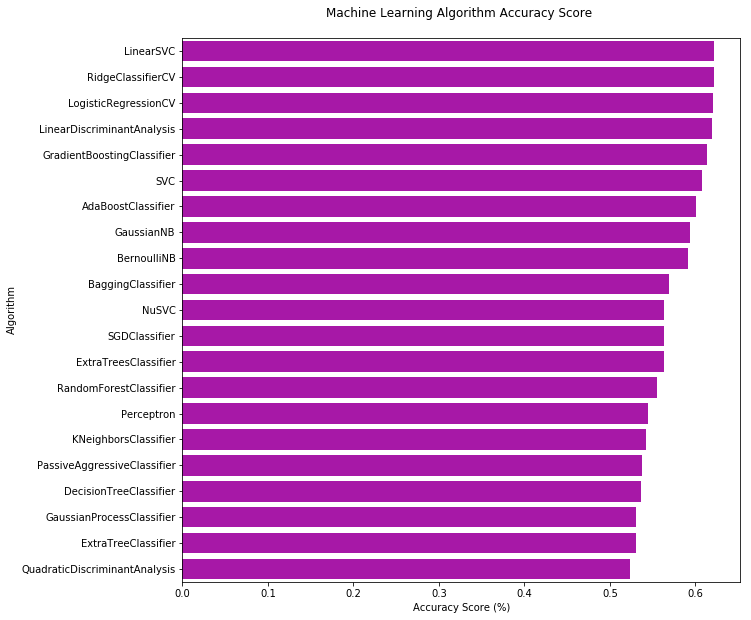

In [17]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=(10,10))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Text(0,0.5,'Algorithm')

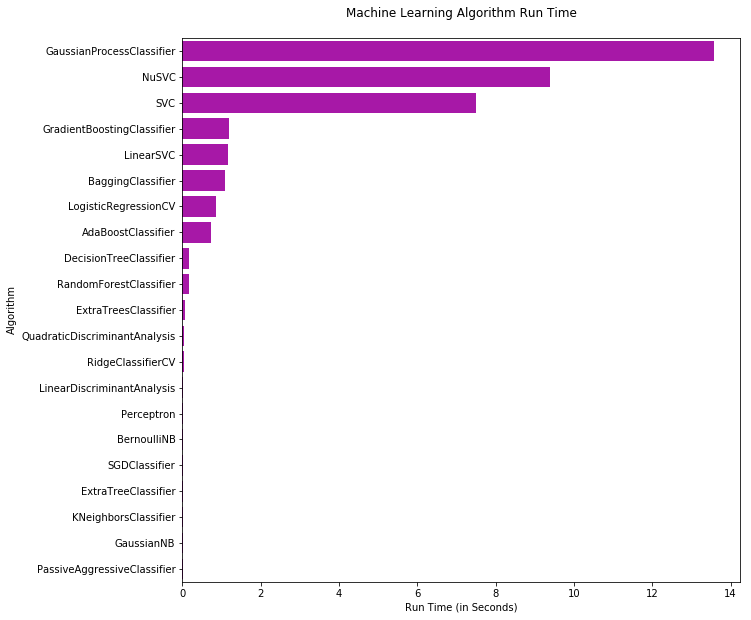

In [18]:
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Time'], ascending = False, inplace = True)

#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=(10,10))
#plt.savefig(dpi=300) 
sns.barplot(x='MLA Time', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Run Time\n')
plt.xlabel('Run Time (in Seconds)')
plt.ylabel('Algorithm')